In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
cd /content/drive/MyDrive/Colab Notebooks/0814_4th Presentation/

/content/drive/MyDrive/Colab Notebooks/0814_4th Presentation


In [34]:
pwd

'/content/drive/MyDrive/Colab Notebooks/0814_4th Presentation'

In [35]:
pip install rfpimp

In [36]:
from sklearn.model_selection import train_test_split, GridSearchCV, validation_curve
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MaxAbsScaler
import pandas as pd
import matplotlib.pyplot as plt
import sklearn


# CART
from sklearn.tree import DecisionTreeRegressor

# random forest
from sklearn.ensemble import RandomForestRegressor

# feature importance
import rfpimp

# xgboost
import xgboost
from xgboost import XGBRegressor

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

In [37]:
# check the library version before we start
print("xgboost version:{}".format(xgboost.__version__))
print("sklearn version:{}".format(sklearn.__version__))

xgboost version:1.7.6
sklearn version:1.2.2


In [38]:
import numpy as np

df = pd.read_csv('Cycling/GOV_Selected_2/10_Cycle_All Accident_Street View_Accident Rate_A&S_3.csv')


# 3. 将'accident_rate_1'列的数值从0到1分成三个等距区间，并用1、2、3来表示类别
num_bins = 3
bins = np.linspace(0, 1, num_bins + 1)  # 等距分为三个区间
labels = [1, 2, 3]  # 对应的类别标签

# 4. 更新DataFrame中'accident_rate_1'列的数值为新的类别
df['accident_rate_category'] = pd.cut(df['accident_rate'], bins=bins, labels=labels, include_lowest=True)


print(df)

df.to_csv("Cycling/GOV_Selected_2/10_Cycle_All Accident_Street View_Accident Rate_A&S_3_category.csv", index=False)

      motorcycle  terrain  traffic sign  bicycle    road  traffic light  \
0              0   432549             0        0  328948              0   
1              0   506145             0        0  300444              0   
2              0   330418           313      238  463251              0   
3              0   345891            43        0  399882              0   
4              0    50129           859       30  598866            109   
...          ...      ...           ...      ...     ...            ...   
8671           0        0           333        0       0            786   
8672           0        0             0        0       0              0   
8673         738        0           497        0       0              0   
8674           0        0          1588        0       0              0   
8675           0        0             0        0       0              0   

         sky  pole  vegetation  fence  ...  weather_conditions  \
0     546256   178      310031   

In [106]:
clean = pd.read_csv('Cycling/GOV_Selected_2/10_Cycle_All Accident_Street View_Accident Rate_A&S_3_category.csv', dtype={'road/building': float})

##df_pedal_cycle = pd.read_csv("Cycling/GOV_Selected/01_Pedal Cycle_accident reference_clean.csv", dtype={'accident_index': str})


clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8676 entries, 0 to 8675
Data columns (total 40 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   motorcycle                               8676 non-null   int64  
 1   terrain                                  8676 non-null   int64  
 2   traffic sign                             8676 non-null   int64  
 3   bicycle                                  8676 non-null   int64  
 4   road                                     8676 non-null   int64  
 5   traffic light                            8676 non-null   int64  
 6   sky                                      8676 non-null   int64  
 7   pole                                     8676 non-null   int64  
 8   vegetation                               8676 non-null   int64  
 9   fence                                    8676 non-null   int64  
 10  building                                 8676 no

In [107]:
clean = clean[clean['accident_severity'] != 1]

In [108]:
# 定义转换关系
replace_dict = { 2: 3, 3: 1}

# 替换accident_severity的值
clean['adjusted_severity'] = clean['accident_severity'].replace(replace_dict)

# 乘以accident_rate_category
clean['weighted_accident_rate'] = clean['accident_rate_category'] * clean['adjusted_severity']

print(clean)

      motorcycle  terrain  traffic sign  bicycle    road  traffic light  \
0              0   432549             0        0  328948              0   
1              0   506145             0        0  300444              0   
2              0   330418           313      238  463251              0   
3              0   345891            43        0  399882              0   
4              0    50129           859       30  598866            109   
...          ...      ...           ...      ...     ...            ...   
8671           0        0           333        0       0            786   
8672           0        0             0        0       0              0   
8673         738        0           497        0       0              0   
8674           0        0          1588        0       0              0   
8675           0        0             0        0       0              0   

         sky  pole  vegetation  fence  ...  special_conditions_at_site  \
0     546256   178      3

In [109]:
# 定义转换关系
replace_dict = { 1:2, 3:2, 6: 3, 9:3}

# 替换accident_severity的值
clean['adjusted_weighted_accident_rate'] = clean['weighted_accident_rate'].replace(replace_dict)

print(clean)

      motorcycle  terrain  traffic sign  bicycle    road  traffic light  \
0              0   432549             0        0  328948              0   
1              0   506145             0        0  300444              0   
2              0   330418           313      238  463251              0   
3              0   345891            43        0  399882              0   
4              0    50129           859       30  598866            109   
...          ...      ...           ...      ...     ...            ...   
8671           0        0           333        0       0            786   
8672           0        0             0        0       0              0   
8673         738        0           497        0       0              0   
8674           0        0          1588        0       0              0   
8675           0        0             0        0       0              0   

         sky  pole  vegetation  fence  ...  carriageway_hazards  \
0     546256   178      310031  

In [110]:
clean.to_csv("Cycling/GOV_Selected_2/10_Cycle_All Accident_Street View_Weighted Accident Rate_A&S_3_category.csv", index=False)

In [113]:
clean = pd.read_csv('Cycling/GOV_Selected_2/10_Cycle_All Accident_Street View_Weighted Accident Rate_A&S_3_category.csv')

# 删除 junction_location 列中值为9的行
##clean = clean[clean['junction_location'] != 9]

##clean = clean[clean['junction_control'] != -1]
##clean = clean[clean['junction_control'] != 9]

print(clean)
clean.info()

      motorcycle  terrain  traffic sign  bicycle    road  traffic light  \
0              0   432549             0        0  328948              0   
1              0   506145             0        0  300444              0   
2              0   330418           313      238  463251              0   
3              0   345891            43        0  399882              0   
4              0    50129           859       30  598866            109   
...          ...      ...           ...      ...     ...            ...   
8660           0        0           333        0       0            786   
8661           0        0             0        0       0              0   
8662         738        0           497        0       0              0   
8663           0        0          1588        0       0              0   
8664           0        0             0        0       0              0   

         sky  pole  vegetation  fence  ...  carriageway_hazards  \
0     546256   178      310031  

In [114]:
random_state_split = 100

train_x, test_x, train_y, test_y = train_test_split(clean.drop(['carriageway_hazards','trunk_road_flag','junction_location','closest_road_length','accidents','all accident counts','accident_rate','accident_rate_category','accident_severity','adjusted_severity','weighted_accident_rate','adjusted_weighted_accident_rate'], axis = 1), clean['adjusted_weighted_accident_rate'], random_state=random_state_split)


In [115]:
from imblearn.over_sampling import SMOTE

# 使用SMOTE进行过采样
sm = SMOTE(random_state=random_state_split)
train_x_resampled, train_y_resampled = sm.fit_resample(train_x, train_y)

# 使用SMOTE进行过采样
sm = SMOTE(random_state=random_state_split)
test_x_resampled, test_y_resampled = sm.fit_resample(test_x, test_y)

In [116]:
# 打印过采样前后的类别计数
print("Before SMOTE:", train_y.value_counts())
print("After SMOTE:", train_y_resampled.value_counts())

print("Before SMOTE:", test_y.value_counts())
print("After SMOTE:", test_y_resampled.value_counts())

Before SMOTE: 2    5613
3     885
Name: adjusted_weighted_accident_rate, dtype: int64
After SMOTE: 2    5613
3    5613
Name: adjusted_weighted_accident_rate, dtype: int64
Before SMOTE: 2    1894
3     273
Name: adjusted_weighted_accident_rate, dtype: int64
After SMOTE: 2    1894
3    1894
Name: adjusted_weighted_accident_rate, dtype: int64


In [117]:
print(train_x_resampled.shape)
print(train_y_resampled.shape)
print(test_x_resampled.shape)
print(test_y_resampled.shape)

# check the index of train_x and train_y - they should be identical. The index indicates which rows from the original data.

print(train_x_resampled.index.identical(train_y_resampled.index))
print(test_x.index.identical(test_y.index))

(11226, 31)
(11226,)
(3788, 31)
(3788,)
True
True


In [118]:
from sklearn.tree import DecisionTreeClassifier


# 使用默认设置的CART
cart_default = DecisionTreeClassifier(random_state=0)
cart_default.fit(train_x_resampled, train_y_resampled)
##cart_default.fit(train_x, train_y)
print("Tree depth: {}".format(cart_default.get_depth()))

Tree depth: 30


In [119]:
# 设置超参数
hyperparameters = {'max_depth':[5,10,15,20,25], 'min_samples_split':[18,20,22,24,26]}
randomState_dt = 10000
dt = DecisionTreeClassifier(random_state=randomState_dt)

# 网格搜索
clf = GridSearchCV(dt, hyperparameters)
clf.fit(train_x_resampled, train_y_resampled)
##clf.fit(train_x, train_y)

# 网格搜索 with 5-fold 交叉验证
##clf = GridSearchCV(dt, hyperparameters, cv=10)
##clf.fit(train_x_resampled, train_y_resampled)

print ("The best parameter value is: ")
print (clf.best_params_)
print ("The best score is: ")
print (clf.best_score_)

The best parameter value is: 
{'max_depth': 25, 'min_samples_split': 20}
The best score is: 
0.7876496498600829


In [120]:
# 使用最佳参数训练模型
dt_final = DecisionTreeClassifier(max_depth=clf.best_params_['max_depth'], min_samples_split=clf.best_params_['min_samples_split'], random_state=randomState_dt)
dt_final.fit(train_x_resampled, train_y_resampled)
##dt_final.fit(train_x, train_y)

DecisionTreeClassifier(max_depth=25, min_samples_split=20, random_state=10000)

In [121]:
print("R2 on the training data:")
print(dt_final.score(X=train_x_resampled, y=train_y_resampled))
print("R2 on the testing data:")
print(dt_final.score(X=test_x_resampled, y=test_y_resampled))

##print("R2 on the training data:")
##print(dt_final.score(X=train_x, y=train_y))
##print("R2 on the testing data:")
##print(dt_final.score(X=test_x, y=test_y))


R2 on the training data:
0.9330126492071976
R2 on the testing data:
0.7431362196409715


In [122]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# 预测
##y_pred = dt_final.predict(test_x)
y_pred = dt_final.predict(test_x_resampled)
y_pred_classes = y_pred.round().astype(int)

# 评估
##precision = precision_score(test_y, y_pred_classes, average='weighted')
##recall = recall_score(test_y, y_pred_classes, average='weighted')
##f1 = f1_score(test_y, y_pred_classes, average='weighted')
##accuracy = accuracy_score(test_y, y_pred_classes)

precision = precision_score(test_y_resampled, y_pred_classes, average='weighted')
recall = recall_score(test_y_resampled, y_pred_classes, average='weighted')
f1 = f1_score(test_y_resampled, y_pred_classes, average='weighted')
accuracy = accuracy_score(test_y_resampled, y_pred_classes)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", accuracy)

Precision: 0.7468075412967351
Recall: 0.7431362196409715
F1 Score: 0.7421774264120603
Accuracy: 0.7431362196409715


Precision: 0.7468075412967351
Recall: 0.7431362196409715
F1 Score: 0.7421774264120603


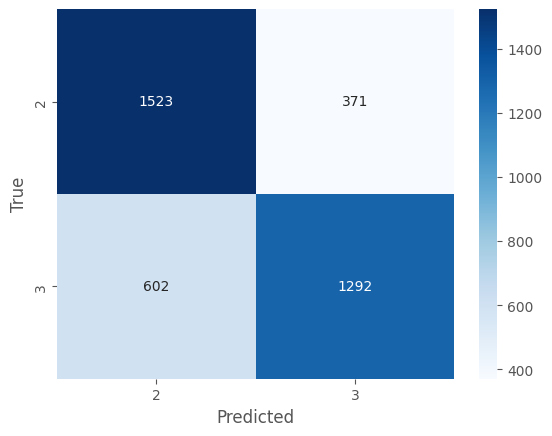

In [123]:
import numpy as np
import seaborn as sns

from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

# Make predictions
y_pred = dt_final.predict(test_x_resampled)
##y_pred = dt_final.predict(test_x)

# Convert predictions to classes
y_pred_classes = y_pred.round().astype(int)

# Convert continuous targets to binary targets
test_y_classes = test_y_resampled.round().astype(int)
##test_y_classes = test_y.round().astype(int)

# Calculate precision, recall, and F1 score with a multiclass metric
precision = precision_score(test_y_classes, y_pred_classes, average='weighted')
recall = recall_score(test_y_classes, y_pred_classes, average='weighted')
f1 = f1_score(test_y_classes, y_pred_classes, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Generate and print the confusion matrix
unique_labels = np.unique(test_y_resampled)
##unique_labels = np.unique(test_y)
cm = confusion_matrix(test_y_classes, y_pred_classes, labels=unique_labels)
# define the class labels
class_names = unique_labels

# plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

# set plot labels
plt.xlabel('Predicted')
plt.ylabel('True')

# show the plot
plt.show()

In [124]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

unique_labels = np.unique(test_y_resampled)
##unique_labels = np.unique(test_y)

# make predictions on test data
predictions = dt_final.predict(test_x_resampled)
##predictions = dt_final.predict(test_x)

# calculate the classification report for each accident_severity value
accident_severity_values = unique_labels
for value in accident_severity_values:
    target_test = (test_y_resampled == value)
    ##target_test = (test_y == value)
    target_pred = (predictions == value)
    print(f"Classification Report for Weighted Accident Rate={value}:")
    print(classification_report(target_test, target_pred))
    precision = precision_score(target_test, target_pred)
    recall = recall_score(target_test, target_pred)
    f1 = f1_score(target_test, target_pred)
    accuracy = accuracy_score(target_test, target_pred)
    tn, fp, fn, tp = confusion_matrix(target_test, target_pred).ravel()
    specificity = tn / (tn + fp)
    print(f"Precision for Weighted Accident Rate={value}: {precision:.2f}")
    print(f"Recall for Weighted Accident Rate={value}: {recall:.2f}")
    print(f"F1-score for Weighted Accident Rate={value}: {f1:.2f}")
    print(f"Accuracy for Weighted Accident Rate={value}: {accuracy:.2f}")
    print(f"Specificity for Weighted Accident Rate={value}: {specificity:.2f}")

Classification Report for Weighted Accident Rate=2:
              precision    recall  f1-score   support

       False       0.78      0.68      0.73      1894
        True       0.72      0.80      0.76      1894

    accuracy                           0.74      3788
   macro avg       0.75      0.74      0.74      3788
weighted avg       0.75      0.74      0.74      3788

Precision for Weighted Accident Rate=2: 0.72
Recall for Weighted Accident Rate=2: 0.80
F1-score for Weighted Accident Rate=2: 0.76
Accuracy for Weighted Accident Rate=2: 0.74
Specificity for Weighted Accident Rate=2: 0.68
Classification Report for Weighted Accident Rate=3:
              precision    recall  f1-score   support

       False       0.72      0.80      0.76      1894
        True       0.78      0.68      0.73      1894

    accuracy                           0.74      3788
   macro avg       0.75      0.74      0.74      3788
weighted avg       0.75      0.74      0.74      3788

Precision for Weight

                                                                      Importance
Feature                                                                         
speed_limit                                                               0.1922
second_road_class                                                         0.1296
junction_control                                                          0.1004
pedestrian_crossing_physical_facilities                                   0.0934
motorcycle                                                                0.0756
terrain                                                                   0.0644
light_conditions                                                          0.0524
sidewalk                                                                  0.0376
vegetation                                                                0.0304
sky                                                                       0.0288
bicycle                     

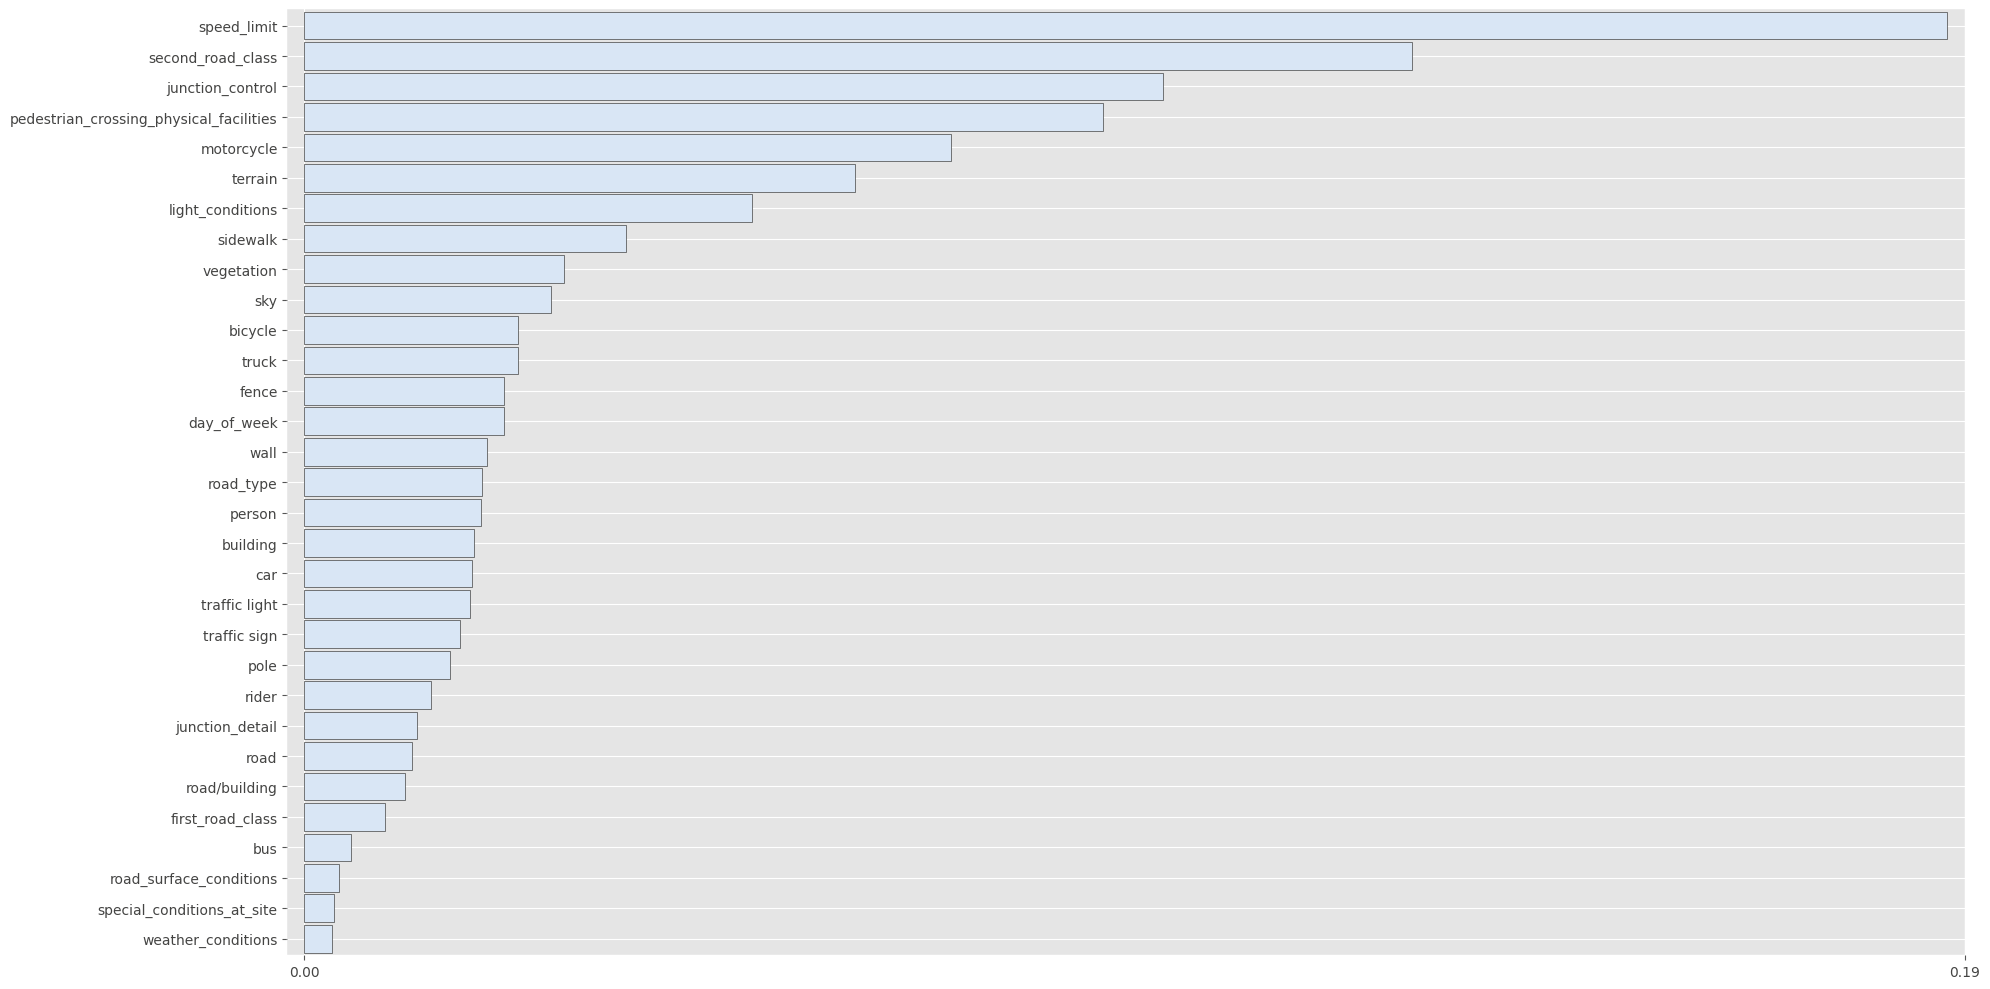

In [126]:
# Combine the features of the training and testing datasets
combined_features = pd.concat([train_x_resampled, test_x_resampled], ignore_index=True)

# Combine the true labels of the training and testing datasets
combined_labels = pd.concat([train_y_resampled, test_y_resampled], ignore_index=True)

# Train your model on the combined data (if needed)
dt_final.fit(combined_features, combined_labels)

# the importances function returns a dataframe of two columns, Feature and Importance, and the features are ranked from the most important to the least.
imp_dt = rfpimp.importances(dt_final, combined_features, combined_labels)
print(imp_dt)

# Here is a barplot of the feature importance
fig, ax = plt.subplots(figsize=(20, 10))
viz = rfpimp.plot_importances(imp_dt, ax=ax)

In [59]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 5.5 MB/s eta 0:00:00


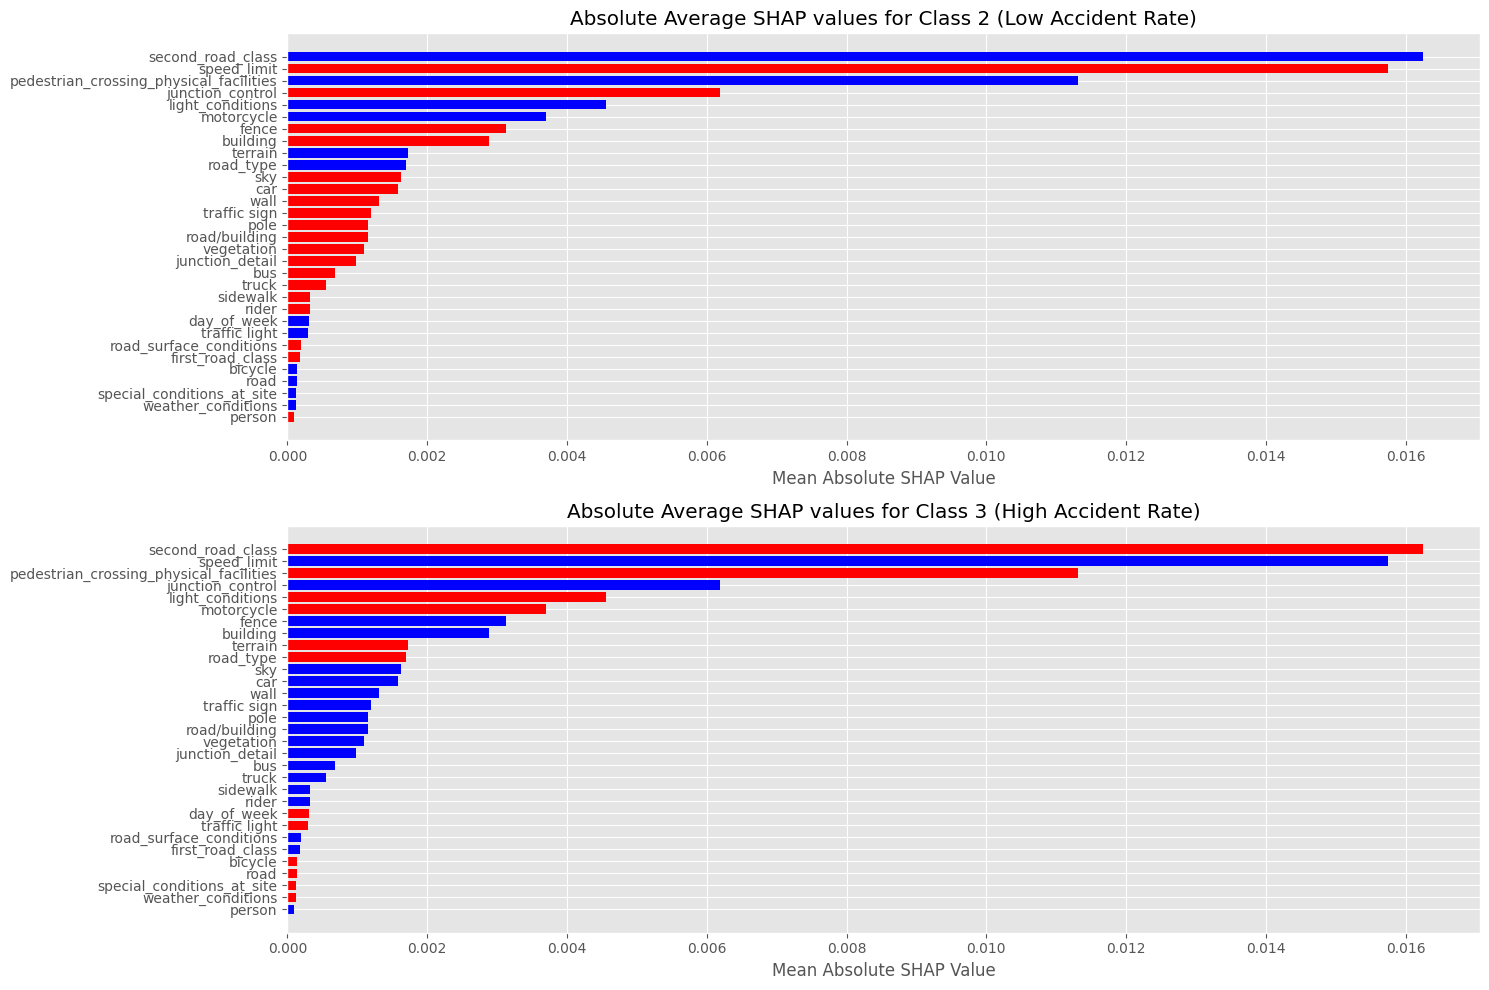

In [137]:
import shap

##combined_features = pd.concat([train_x_resampled, test_x_resampled], ignore_index=True)
##combined_labels = pd.concat([train_y_resampled, test_y_resampled], ignore_index=True)

# 计算每个特征的平均SHAP值的绝对值
abs_mean_shap_values_class2 = np.abs(mean_shap_values_class2)
abs_mean_shap_values_class3 = np.abs(mean_shap_values_class3)

# 对每个特征的平均SHAP值的绝对值进行排序
sorted_indices_class2 = np.argsort(abs_mean_shap_values_class2)
sorted_indices_class3 = np.argsort(abs_mean_shap_values_class3)

# 根据原始SHAP值的正负决定颜色
colors_class2 = ['red' if shap_val > 0 else 'blue' for shap_val in mean_shap_values_class2[sorted_indices_class2]]
colors_class3 = ['red' if shap_val > 0 else 'blue' for shap_val in mean_shap_values_class3[sorted_indices_class3]]

# 绘制柱状图
fig, axs = plt.subplots(2, 1, figsize=(15, 10))

# 绘制类别2的柱状图
axs[0].barh(combined_features.columns[sorted_indices_class2], abs_mean_shap_values_class2[sorted_indices_class2], color=colors_class2)
###test_x_resampled
axs[0].set_title('Absolute Average SHAP values for Class 2 (Low Accident Rate)')
axs[0].set_xlabel('Mean Absolute SHAP Value')

# 绘制类别3的柱状图
axs[1].barh(combined_features.columns[sorted_indices_class3], abs_mean_shap_values_class3[sorted_indices_class3], color=colors_class3)
###test_x_resampled
axs[1].set_title('Absolute Average SHAP values for Class 3 (High Accident Rate)')
axs[1].set_xlabel('Mean Absolute SHAP Value')

plt.tight_layout()
plt.show()

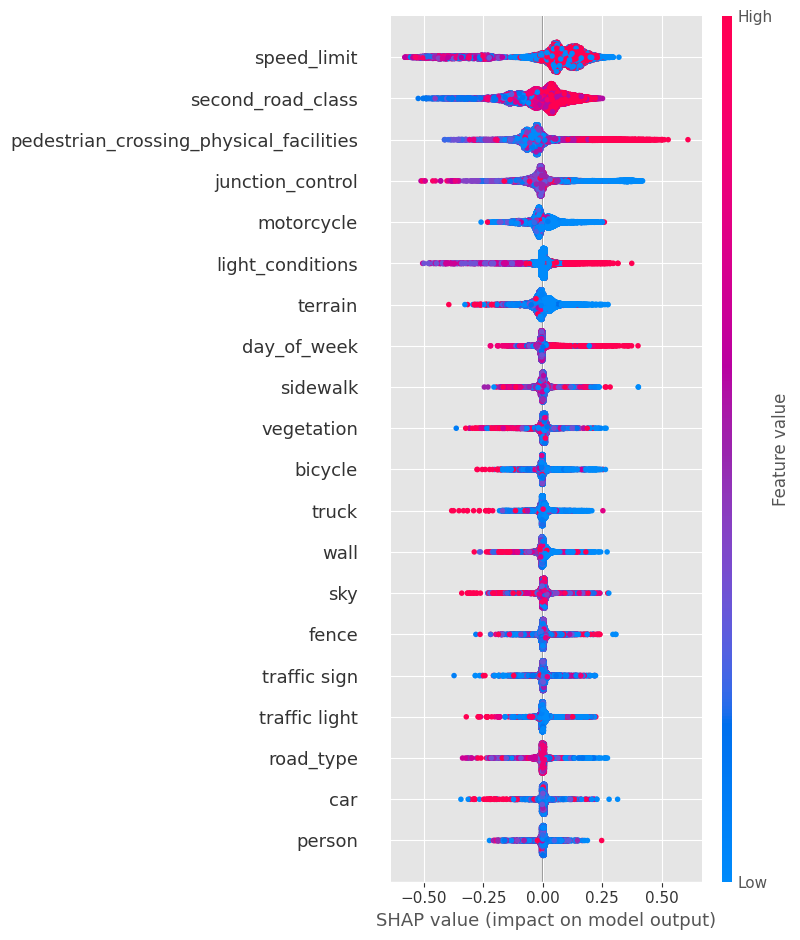

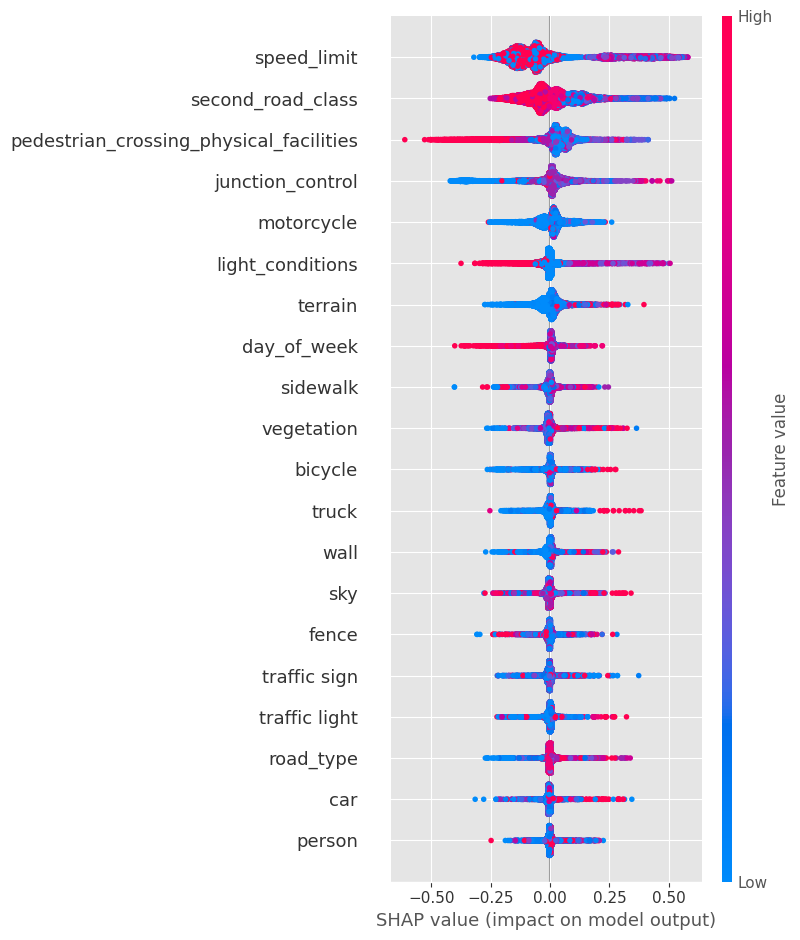

In [135]:
import shap

##combined_features = pd.concat([train_x_resampled, test_x_resampled], ignore_index=True)
##combined_labels = pd.concat([train_y_resampled, test_y_resampled], ignore_index=True)


# 初始化Tree解释器
explainer = shap.TreeExplainer(dt_final)

# 计算SHAP值
##shap_values = explainer.shap_values(test_x_resampled)

# 对于类别2 (假设0索引代表类别2)
##shap.summary_plot(shap_values[0], test_x_resampled)

# 对于类别3 (假设1索引代表类别3)
##shap.summary_plot(shap_values[1], test_x_resampled)



# 计算SHAP值
shap_values = explainer.shap_values(combined_features)

# 对于类别2 (假设0索引代表类别2)
shap.summary_plot(shap_values[0], combined_features)

# 对于类别3 (假设1索引代表类别3)
shap.summary_plot(shap_values[1], combined_features)

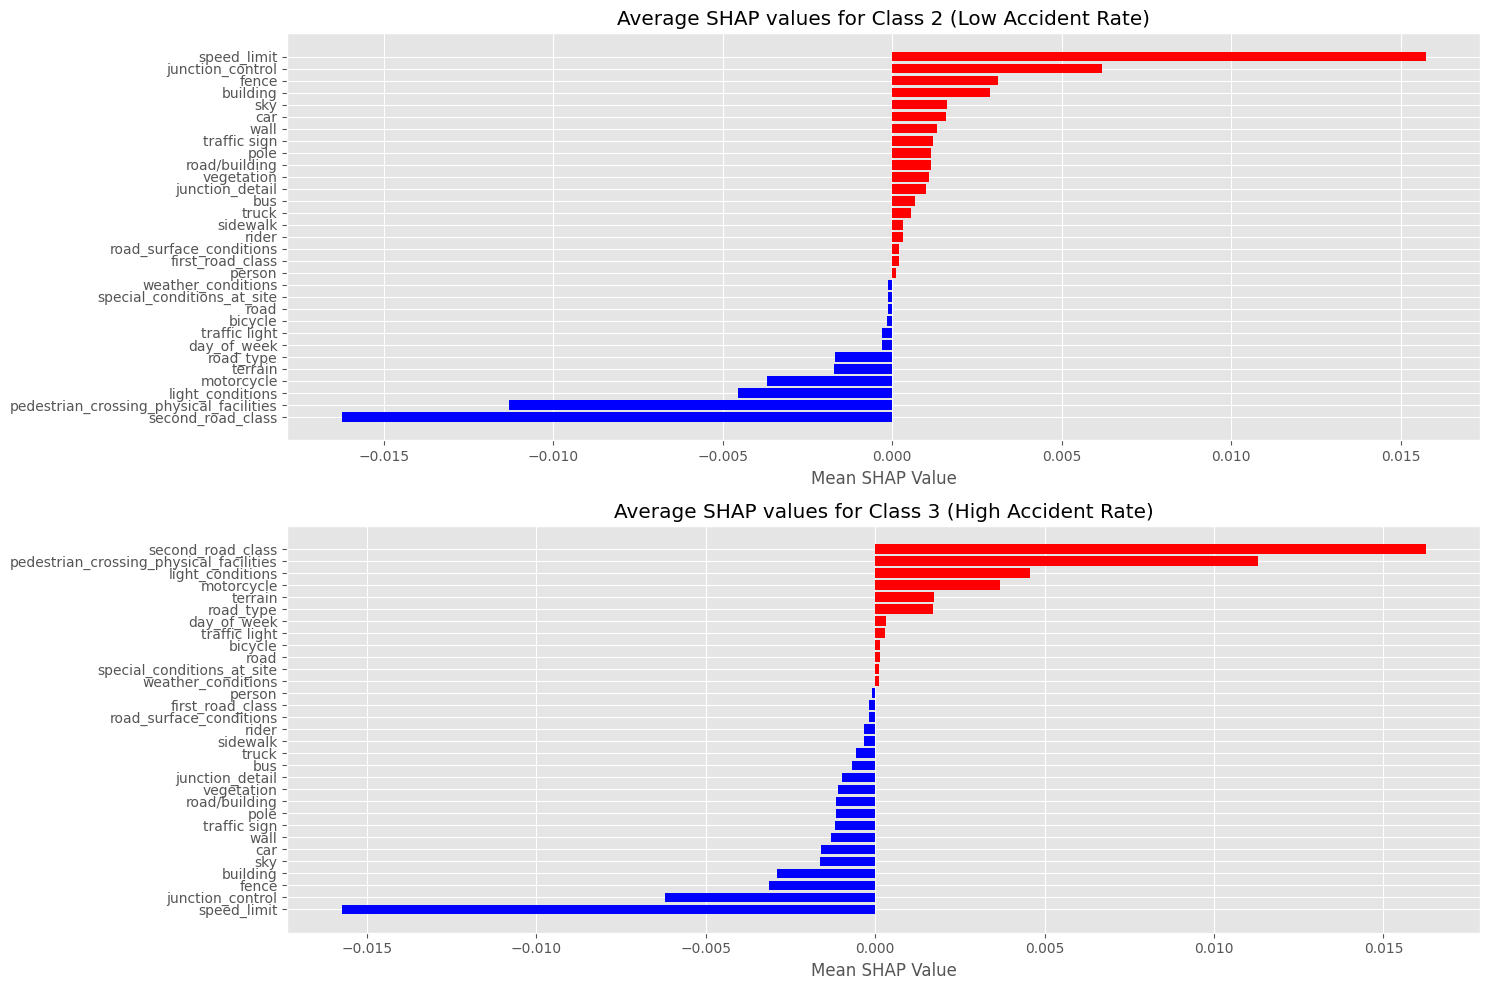

In [133]:



# 计算每个特征的平均SHAP值
mean_shap_values_class2 = np.mean(shap_values[0], axis=0)
mean_shap_values_class3 = np.mean(shap_values[1], axis=0)

# 对每个特征的平均SHAP值进行排序
sorted_indices_class2 = np.argsort(mean_shap_values_class2)
sorted_indices_class3 = np.argsort(mean_shap_values_class3)

# 根据SHAP值的正负决定颜色
colors_class2 = ['red' if shap_val > 0 else 'blue' for shap_val in mean_shap_values_class2[sorted_indices_class2]]
colors_class3 = ['red' if shap_val > 0 else 'blue' for shap_val in mean_shap_values_class3[sorted_indices_class3]]

# 绘制柱状图
fig, axs = plt.subplots(2, 1, figsize=(15, 10))

# 绘制类别2的柱状图
##axs[0].barh(test_x_resampled.columns[sorted_indices_class2], mean_shap_values_class2[sorted_indices_class2], color=colors_class2)
axs[0].barh(combined_features.columns[sorted_indices_class2], mean_shap_values_class2[sorted_indices_class2], color=colors_class2)
axs[0].set_title('Average SHAP values for Class 2 (Low Accident Rate)')
axs[0].set_xlabel('Mean SHAP Value')

# 绘制类别3的柱状图
##axs[1].barh(test_x_resampled.columns[sorted_indices_class3], mean_shap_values_class3[sorted_indices_class3], color=colors_class3)
axs[1].barh(combined_features.columns[sorted_indices_class3], mean_shap_values_class3[sorted_indices_class3], color=colors_class3)
axs[1].set_title('Average SHAP values for Class 3 (High Accident Rate)')
axs[1].set_xlabel('Mean SHAP Value')

plt.tight_layout()
plt.show()

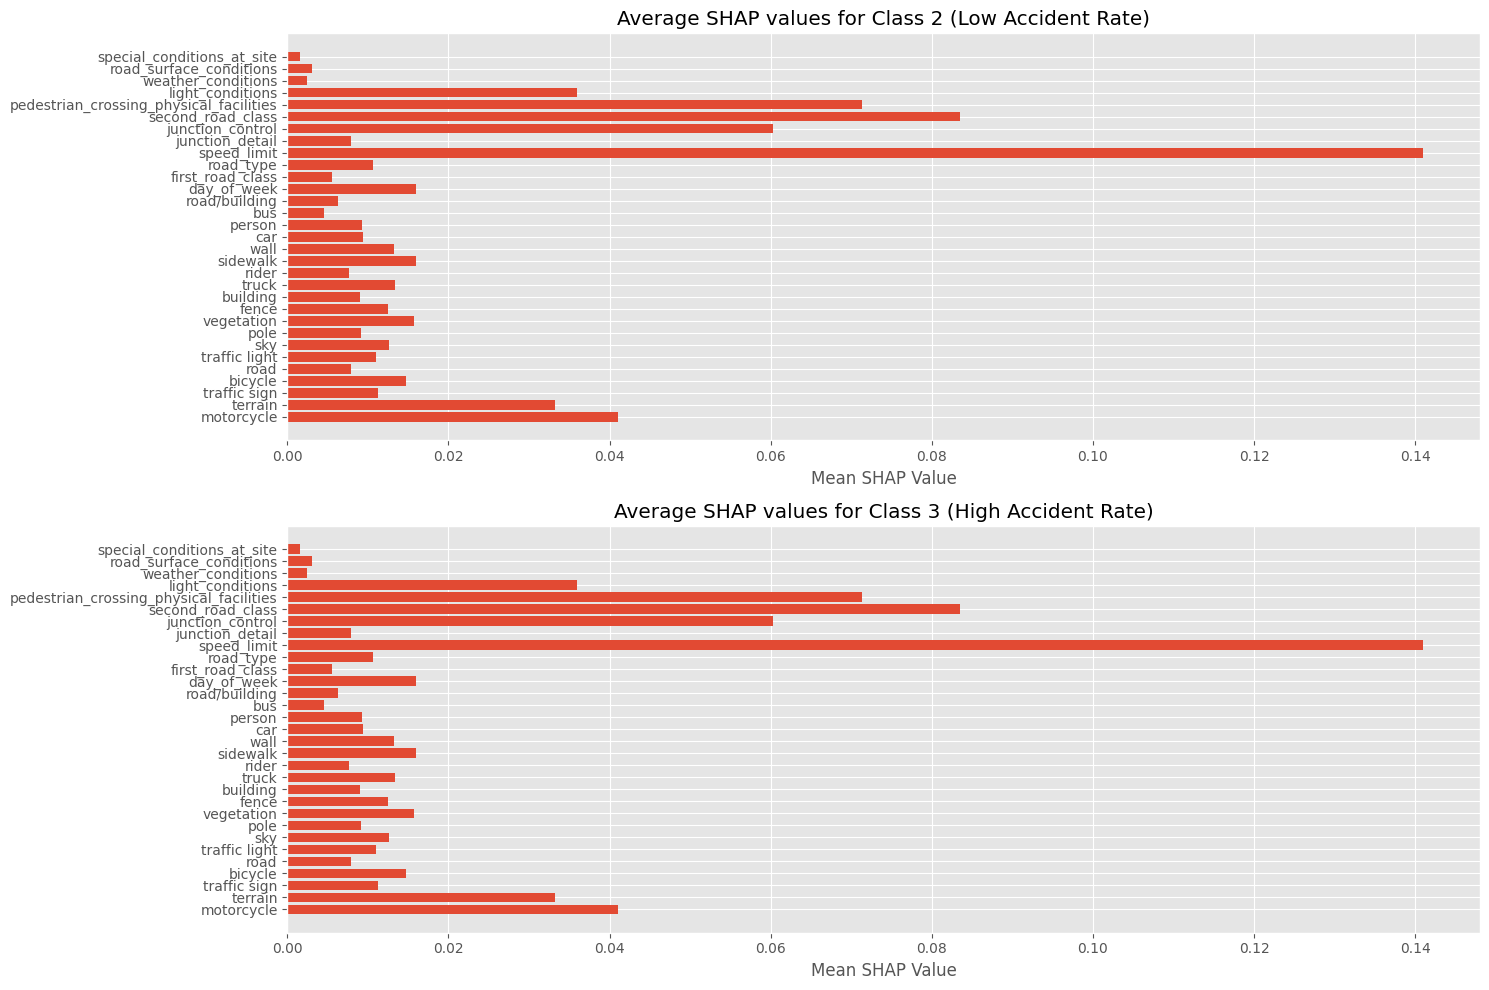

In [132]:
import numpy as np
import matplotlib.pyplot as plt

##combined_features = pd.concat([train_x_resampled, test_x_resampled], ignore_index=True)
##combined_labels = pd.concat([train_y_resampled, test_y_resampled], ignore_index=True)

# 计算每个特征的平均SHAP值
mean_shap_values_class2 = np.mean(np.abs(shap_values[0]), axis=0)
mean_shap_values_class3 = np.mean(np.abs(shap_values[1]), axis=0)

# 绘制柱状图
fig, axs = plt.subplots(2, 1, figsize=(15, 10))

# 绘制类别2的柱状图
##axs[0].barh(test_x_resampled.columns, mean_shap_values_class2)
axs[0].barh(combined_features.columns, mean_shap_values_class2)
axs[0].set_title('Average SHAP values for Class 2 (Low Accident Rate)')
axs[0].set_xlabel('Mean SHAP Value')

# 绘制类别3的柱状图
##axs[1].barh(test_x_resampled.columns, mean_shap_values_class3)
axs[1].barh(combined_features.columns, mean_shap_values_class3)
axs[1].set_title('Average SHAP values for Class 3 (High Accident Rate)')
axs[1].set_xlabel('Mean SHAP Value')

plt.tight_layout()
plt.show()

In [65]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=751111c410703c531d538b91d1ce4a6dc2d5f92c4cda7ce2ec0a2bc6a66b3ebd
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [136]:
import lime
from lime import lime_tabular

# 1. 创建LIME解释器
explainer = lime_tabular.LimeTabularExplainer(combined_features.values,
                                              ###train_x_resampled.values,
                                              feature_names=train_x_resampled.columns.values.tolist(),
                                              class_names=['2', '3'],
                                              verbose=True,
                                              mode='classification')

# 2. 选择一个测试实例进行解释
###sample_index = np.random.choice(test_x_resampled.shape[0])
sample_index = np.random.choice(combined_features.shape[0])
###instance = test_x_resampled.iloc[sample_index].values
instance = combined_features.iloc[sample_index].values

# 3. 解释该实例
###exp = explainer.explain_instance(instance, dt_final.predict_proba, num_features=10)
exp = explainer.explain_instance(instance, dt_final.predict_proba, num_features=18)


# 4. 展示解释结果
exp.show_in_notebook(show_table=True, show_all=False)

Intercept 0.8458277211308156
Prediction_local [0.6928723]
Right: 0.0


X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
